In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection

In [74]:
def trend_line(x, y, degree=1):
  coeffs = np.polyfit(x, y, degree)
  poly = np.poly1d(coeffs)
  y_trend = poly(x)
  return coeffs, y_trend

In [75]:
frame = pd.read_csv("../data/elektromagnetyzm_203/data.csv")
temp = frame['temp']
semi = frame['semi']
cond = frame['cond']

In [76]:
cond_trend = trend_line(cond, temp)[1]
semi_trend = trend_line(semi, temp, 2)[1]

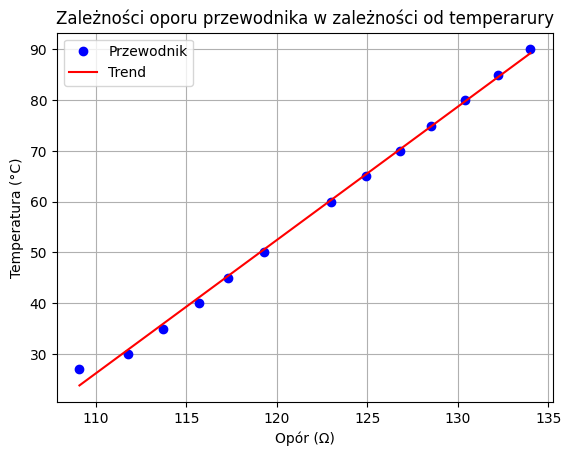

In [77]:
plt.plot(cond, temp, "bo", label="Przewodnik")
plt.plot(cond, cond_trend, "r-", label="Trend")
plt.grid()
plt.title("Zależności oporu przewodnika w zależności od temperarury")
plt.xlabel("Opór (Ω)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()
plt.close()

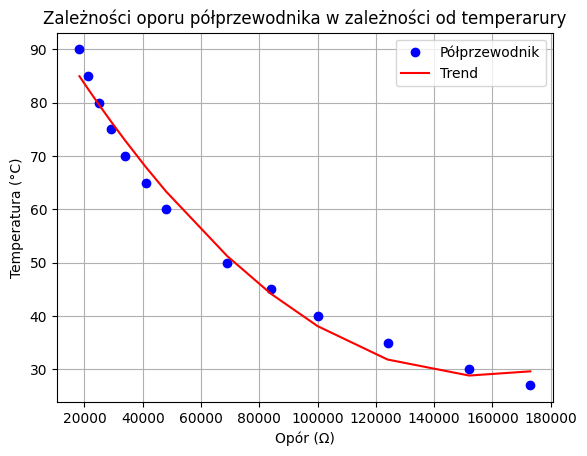

In [78]:
plt.plot(semi, temp, "bo", label="Półprzewodnik")
plt.plot(semi, semi_trend, "r-", label="Trend")
plt.grid()
plt.title("Zależności oporu półprzewodnika w zależności od temperarury")
plt.xlabel("Opór (Ω)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()
plt.close()